# 雑草の生育期間を区別して分類器を作る（芽生え）
　雑草の生育期間が芽生えのデータを用いて分類器を作成します。 育成した雑草の種類はハキダメギク、ホソアオゲイトウ、イチビ、イヌビエ、コセンダングサ、マメアサガオ、メヒシバ、オヒシバ、オイヌタデ、シロザの10種類です

### ■データのダウンロード

・cluster.zipをダウンロードします。

In [ ]:
#グーグルドライブからファイルをダウンロードする方法
#ファイル限定

# import requests

# def download_file_from_google_drive(id, destination):

#     URL = "https://docs.google.com/uc?export=download"

#     session = requests.Session()

#     response = session.get(URL, params = { 'id' : id }, stream = True)

#     token = get_confirm_token(response)

#     if token:

#         params = { 'id' : id, 'confirm' : token }

#         response = session.get(URL, params = params, stream = True)

#     save_response_content(response, destination)    

# def get_confirm_token(response):

#     for key, value in response.cookies.items():

#         if key.startswith('download_warning'):

#             return value

#     return None

# def save_response_content(response, destination):

#     CHUNK_SIZE = 32768

#     with open(destination, "wb") as f:

#         for chunk in response.iter_content(CHUNK_SIZE):

#             if chunk: # filter out keep-alive new chunks

#                 f.write(chunk)

# #取得されるトークン
# file_id = '1R9a1hhjnjX72Ov3dRZcdo8T7qE8da5L0'

# #欲しいフォルダ名
# destination = 'cluster.zip'

# download_file_from_google_drive(file_id, destination)



・cluster.zipを解凍します。

In [ ]:
!unzip cluster
print("clusterファイルの解凍が完了しました。")

### ■データセットの作成

・データセットの画像を表示します（芽生え）

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

def show_weed():
  #　雑草名と生育状態をリストに定義
  weed_names = ["hakidamegiku","hosoaogeitou","ichibi","inubie","kosendangusa","mameasagao","mehishiba","ohishiba","oinutade","shiroza"]
  weed_type = ["sprout", "grown"]

  #　データ格納フォルダを指定
  input_dir = "./cluster"

  #　リストの長さを足して表示枚数を確認
  hs = len(weed_names)

  #　表示設定
  col=len(weed_names)
  row=hs/col
  cols=col*4
  rows=row*4
  dpis = 100

  #　イメージの表示サイズ、解像度
  fig = plt.figure(figsize=(cols,rows),dpi=dpis)
  
  #　＊＊番目に指定
  pi=1

  #　イメージ表示
  for weed_name in weed_names:
    #　1段目
    img_path = os.path.join(input_dir, weed_name, weed_type[0])
    img_list = os.listdir(img_path)
    plot_num = pi
    ax=fig.add_subplot(row, col, plot_num)
    ax.set_title(weed_name, fontsize=20)
    if plot_num == 1:
      plt.ylabel(weed_type[0], fontsize=20) # y軸ラベル
    img = Image.open(os.path.join(img_path, img_list[6])) # indexを変更して別の画像を表示！！
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
    plt.imshow(img, cmap='gray')
    pi = pi+1
  fig.align_labels()

show_weed()

・train、validation、prediction用のディレクトリを作成し、class用のディレクトリを追加します

In [4]:
import os, shutil

# The directory where we will
# store our smaller dataset
base_dir = "./CLS"
if "CLS" not in os.listdir("./"):
  os.mkdir(base_dir)
else:
  print(base_dir, "は既に存在します")

train_index = "train"
train_dir = os.path.join(base_dir, train_index)
if train_index not in os.listdir(base_dir):
  os.mkdir(train_dir)
else:
  print(train_dir + "は既に存在します")

validation_index = "validation"
validation_dir = os.path.join(base_dir, validation_index)
if validation_index not in os.listdir(base_dir):
  os.mkdir(validation_dir)
else:
  print(validation_dir + "は既に存在します")

prediction_index = "prediction"
prediction_dir = os.path.join(base_dir, prediction_index)
if prediction_index not in os.listdir(base_dir):
  os.mkdir(prediction_dir)
else:
  print(prediction_dir + "は既に存在します")

#10分類のclassを入力
classes=["hakidamegiku","hosoaogeitou","ichibi",
         "inubie","kosendangusa","mameasagao",
         "mehishiba","ohishiba","oinutade","shiroza",]
dirs = os.listdir(base_dir)
for dir in dirs:
  for cls in classes:
    # Directory with our training pictures
    class_dir = os.path.join(base_dir, dir, cls)
    if cls not in os.listdir(base_dir + "/" + dir):
      os.mkdir(class_dir)
    else:
      print(class_dir, "は既に存在します")

print("作成完了！")

作成完了！


・画像をディレクトリに振り分けます

In [5]:
from os.path import join
import random

clsdir = "./cluster"
base_dir = "./CLS"
dirs = os.listdir(base_dir)
# weed_typeを芽生えのみに設定
weed_types = ["sprout"]
weed_names = os.listdir(clsdir)
# ファイル（クラスごとに分かれている）を順番に読み取り
# train, validationデータを作成
for weed_name in weed_names:
  for weed_type in weed_types: 
    print(weed_name, "/",weed_type)
    file_names = os.listdir(os.path.join(clsdir, weed_name, weed_type))
    files100 = random.sample(file_names, int(50))
    num1 = 0
    num2 = 0
    for file_name in file_names:
      if  file_name in files100:
        if num1 >= 45:
          continue
        # 移動元のファイル
        path1 = os.path.join(clsdir, weed_name, weed_type, file_name)
        # 移動先のファイル
        path2= os.path.join(base_dir, "train", weed_name, file_name)
        # ファイルを移動
        new_path = shutil.move(path1, path2)
        # ファイルの存在確認
        print(os.path.exists(path2))
        num1 = num1 + 1
      else:
        if num2 >= 45:
          continue 
        # 移動元のファイル
        path1 = os.path.join(clsdir, weed_name, weed_type, file_name)
        # 移動先のファイル
        path2= os.path.join(base_dir, "validation", weed_name, file_name)
        # ファイルを移動
        new_path = shutil.move(path1, path2)
        # ファイルの存在確認
        print(os.path.exists(path2))
        num2 = num2 + 1

# predictionデータを作成
for weed_name in weed_names:
  for weed_type in weed_types:
    print(weed_name, "/",weed_type)
    file_names = os.listdir(os.path.join(clsdir, weed_name, weed_type))
    for file_name in file_names:      
      # 移動元のファイル
      path1 = os.path.join(clsdir, weed_name, weed_type, file_name)
      # 移動先のファイル
      path2= os.path.join(base_dir, "prediction", weed_name, file_name)
      # ファイルを移動
      new_path = shutil.move(path1, path2)
      # ファイルの存在確認
      print(os.path.exists(path2))


mameasagao / sprout
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
ohishiba / sprout
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
shiroza / sprout
True
True
True
True
True
True
True
True
True


・trainデータ、validationデータ、predictionデータのgeneratorを作成します

In [6]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image

input_size = 224

train_dir = "./CLS/train"
validation_dir = "./CLS/validation"


train_datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            rescale=1./255
        )

val_datagen = Image.ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

validation_generator = val_datagen.flow_from_directory(
            validation_dir,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )
print("データセット作成完了！")

Found 450 images belonging to 10 classes.
Found 450 images belonging to 10 classes.
データセット作成完了！


### ■トレーニングの実行

・モデルのレイヤー構成を定義します

In [7]:

#ファインチューニング+VGG+水増し。ここから実行してOK（VGG16をダウンロード）
from keras import models
from keras import layers
from keras.optimizers import adam_v2
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.applications.vgg16 import VGG16
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import History, Callback
# from keras.objectives import categorical_crossentropy
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from scipy.stats import mode
import os, pickle


def create_cnn():
  input_size=224
  #input_sizeは224,224までOK。

  vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(input_size,input_size, 3))
  last = vgg_conv.output

  vgg_conv.trainable = True

  set_trainable = False
  for layer in vgg_conv.layers:
    if layer.name == 'block5_conv1':
      set_trainable = True
    if set_trainable:
      layer.trainable = True
    else:
      layer.trainable = False

  mod = Flatten()(last)
  mod = Dense(256, activation='relu')(mod)
  #mod = Dropout(0.5)(mod)
  preds = Dense(10, activation='softmax')(mod)

  model = models.Model(vgg_conv.input, preds)

  return model
print("レイヤー構成を定義しました！")

レイヤー構成を定義しました！


・チェックポイントを定義します(val lossが一番低い値の時にweightファイルを保存)

In [8]:
class Checkpoint(Callback):
    def __init__(self, model, filepath):
        self.model = model
        self.filepath = filepath
        self.best_val_acc = 0.0
        self.best_val_loss = 0.95

    def on_epoch_end(self, epoch, logs):
        # val_lossが最小の時ににweightを保存する
        if self.best_val_loss > logs["val_loss"]:
            self.model.save_weights(self.filepath)
            self.best_val_loss = logs["val_loss"]
            print("Weights saved.", self.best_val_loss)
print("チェックポイントを定義しました！")

チェックポイントを定義しました！


・学習の実行手順を定義します

In [9]:
def train():
    print("学習を開始します")
    hist = History()
    train_model = create_cnn()
    train_model.compile(optimizer=adam_v2.Adam(learning_rate=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
    cp = Checkpoint(train_model, f"weights.hdf5")
    train_model.fit_generator(train_generator,epochs=10,validation_data=validation_generator,callbacks=[hist, cp])      
    print("学習が完了しました")
    return hist.history
print("実行手順を定義しました！")

実行手順を定義しました！


・学習を開始します

In [10]:
K.clear_session()
hist = train()

学習を開始します
58900480/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
45/45 [==============================] - 24s 227ms/step - loss: 2.2315 - accuracy: 0.1867 - val_loss: 1.9713 - val_accuracy: 0.2956
Epoch 2/10
45/45 [==============================] - 10s 228ms/step - loss: 1.8923 - accuracy: 0.3044 - val_loss: 1.6789 - val_accuracy: 0.4244
Epoch 3/10
45/45 [==============================] - 11s 243ms/step - loss: 1.6835 - accuracy: 0.3844 - val_loss: 1.4927 - val_accuracy: 0.4956
Epoch 4/10
45/45 [==============================] - 10s 223ms/step - loss: 1.5081 - accuracy: 0.4667 - val_loss: 1.3868 - val_accuracy: 0.5111
Epoch 5/10
45/45 [==============================] - 10s 224ms/step - loss: 1.3492 - accuracy: 0.5222 - val_loss: 1.2206 - val_accuracy: 0.5911
Epoch 6/10
45/45 [==============================] - 10s 225ms/step - loss: 1.2032 - accuracy: 0.5644 - val_loss: 1.0521 - val_accuracy: 0.6267
Epoch 7/10
45/45 [==============================] - 10s 223ms/step - loss: 1.0021 - accuracy: 0.6689 - val_loss: 0.9548 - val_accuracy: 0.6556

### ■正解率と損失率をグラフ化

・trainの正解率と損失率、validationの正解率と損失率をグラフ化します

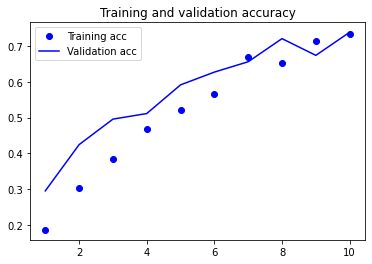

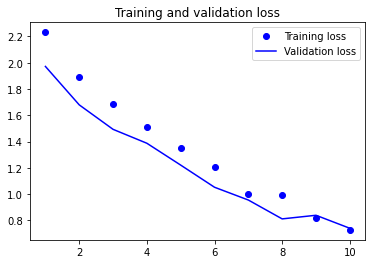

In [11]:
import matplotlib.pyplot as plt

history = hist

acc=history['accuracy']
val_acc=history['val_accuracy']
loss=history['loss']
val_loss=history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### ■テスト

・prediction用のデータセットを作成します

In [12]:
from PIL import Image
import os, glob
import numpy as np
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES =True

prediction_dir = "./CLS/prediction"
prediction_classes = ["hakidamegiku","hosoaogeitou","ichibi","inubie","kosendangusa","mameasagao","mehishiba","ohishiba","oinutade","shiroza"]

image_size = 224
print(prediction_classes)
X_test = []
y_test = []
for index, classlabel in enumerate(prediction_classes):
    photos_dir = os.path.join(prediction_dir, classlabel)
    files = glob.glob(photos_dir + "/*.JPG")
    print(files)
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        if i == 0:
          print(data.shape)
        X_test.append(data)
        y_test.append(index)

X_test1 = np.array(X_test)
y_test1 = np.array(y_test)
print("predictionデータ作成完了！")

['hakidamegiku', 'hosoaogeitou', 'ichibi', 'inubie', 'kosendangusa', 'mameasagao', 'mehishiba', 'ohishiba', 'oinutade', 'shiroza']
['./CLS/prediction/hakidamegiku/hakidamegiku_IMG_1786_3.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_4886_4.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_1773_11.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_1807_1.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_1525_8.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_1525_3.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_1786_7.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_4887_3.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_1787_5.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_1524_4.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_1595_19.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_1794_7.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_1547_15.JPG', './CLS/prediction/hakidamegiku/hakidamegiku_IMG_1787_8.JPG', './CLS/pred

・混同行列表示用の関数を定義します

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=-90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print("混同行列表示用の関数を定義しました！")

混同行列表示用の関数を定義しました！


・保存したweightファイルをロードしてpredictionを行います

In [14]:
def sin_predict():
    
    X_test, y_test = X_test1, y_test1
    X_test = X_test / 255.0
    y_test_label = np.ravel(y_test)
    y_test = to_categorical(y_test)
  
    train_model = create_cnn()
    train_model.compile(optimizer=adam_v2.Adam(learning_rate=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

    # 最良のモデルの読み込み
    train_model.load_weights(f"weights.hdf5")
    for layer in train_model.layers:
        layer.trainable = False

    # 単体のテスト
    single_pred = np.argmax(train_model.predict(X_test), axis=-1)

    # テストのスコア
    test_acc = accuracy_score(y_test, to_categorical(single_pred))

    print("テストの結果は", test_acc, "です")
    
    target_names = ["hakidamegiku","hosoaogeitou","ichibi","inubie","kosendangusa","mameasagao","mehishiba","ohishiba","oinutade","shiroza"]
    cm = confusion_matrix(y_test_label, single_pred)
    plot_confusion_matrix(cm, classes = target_names) 
    # print('Classification Report')
    # print(classification_report(y_test_label, single_preds, target_names=target_names))
print("テスト用の関数を定義しました！")

テスト用の関数を定義しました！


・テストを実行します

テストの結果は 0.7281818181818182 です
Confusion matrix, without normalization


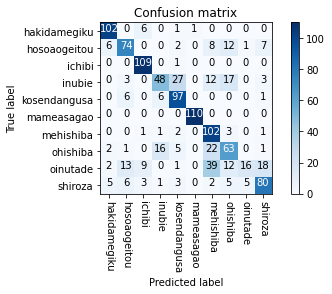

In [15]:
# テスト
sin_predict()

### ■任意の写真をテストします

・画像テスト用の関数を定義します

In [18]:
def result_predict(path):
    prediction_classes = ["hakidamegiku","hosoaogeitou","ichibi","inubie","kosendangusa","mameasagao","mehishiba","ohishiba","oinutade","shiroza"]

    train_model = create_cnn()
    train_model.compile(optimizer=adam_v2.Adam(learning_rate=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

    # 最良のモデルの読み込み
    train_model.load_weights(f"weights.hdf5")
    for layer in train_model.layers:
        layer.trainable = False  
    
    X_test = []
    image_size = 224
    image = Image.open(path)
    image = image.convert("RGB")
    image = image.resize((image_size, image_size))
    data = np.asarray(image)
    X_test.append(data)
    X_test = np.array(X_test) / 255.0
    result = np.argmax(train_model.predict(X_test), axis=-1)
    print("雑草の種類は", prediction_classes[result[0]], "です")
print("画像テスト用の関数を定義しました！")

画像テスト用の関数を定義しました！


・predictionディレクトリから任意の写真を選択しpathを設定します

In [19]:
image_dir = "/content/CLS/prediction/hosoaogeitou/hosoaogeitou_IMG_1527_3.JPG"
result_predict(image_dir)

雑草の種類は hosoaogeitou です
